### Logistic Regression (MNIST)

1. library, data, preprocessing
2. solve logistic model with tensorflow
3. show the result with confusion matrix

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist

In [3]:
data = mnist.load_data()

print('type(data): ', type(data))
print('len(data): ', len(data))

type(data):  <class 'tuple'>
len(data):  2


In [4]:
#traubm test split
train_data, test_data = data
print('len(train_data):', len(train_data))
print('len(test_data):', len(test_data))

len(train_data): 2
len(test_data): 2


In [5]:
#train data X,y split
x_train, y_train = train_data
print('x_train.shape, y_train.shape')
print(x_train.shape, y_train.shape)

#test data X,y split
x_test, y_test = test_data
print('x_test.shape, y_test.shape')
print(x_test.shape, y_test.shape)

x_train.shape, y_train.shape
(60000, 28, 28) (60000,)
x_test.shape, y_test.shape
(10000, 28, 28) (10000,)


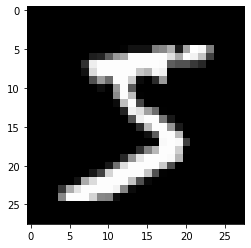

y_train: [5 0 4 ... 5 6 8]
x_train[0]: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

In [6]:
plt.figure()
plt.imshow(x_train[0], 'gray')
plt.show()
print('y_train:', y_train)
print('x_train[0]:',x_train[0])

In [7]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
shape = x_train.shape[1:]
print('shape:', shape)

shape: (28, 28)


In [9]:
#data normalize
reshaped_x_train = x_train.reshape(-1, 784)
reshaped_x_test = x_test.reshape(-1, np.prod(shape))

X_train = reshaped_x_train /255.
X_test = reshaped_x_test /255.

In [10]:
#sparse label to one-hot label

print('10x10 Identity matrix \n', np.eye(10))
sparse_label = np.array([1,3,5,7,9])
print('sparse label: ', sparse_label)
print('sparse label to one hot label\n', np.eye(10)[sparse_label])

10x10 Identity matrix 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
sparse label:  [1 3 5 7 9]
sparse label to one hot label
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
Y_train = np.eye(10)[y_train]
Y_test = np.eye(10)[y_test]

*data load, preprocess sum-up*

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#original image data (28x28 per sample, unnormalized)
#original image label (sparse encoding)
print('image shape: ',x_train.shape, x_test.shape)
print('label shape: ',y_train.shape, y_test.shape)

image shape:  (60000, 28, 28) (10000, 28, 28)
label shape:  (60000,) (10000,)


In [13]:
#Hyper parameter setting
learning_rate = .1
training_epochs = 100
display_step = 5

In [14]:
tf_X = tf.placeholder(tf.float32, [None, 784])
tf_Y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

pred = tf.nn.softmax(tf.matmul(tf_X, W) + b)

#cross entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(tf_Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [15]:
#train
init = tf.global_variables_initializer()

sess  = tf.Session()
sess.run(init)
for epoch in range(0, training_epochs):
    sess.run(optimizer, feed_dict={tf_X:X_train, tf_Y: Y_train})
    
print('최적화 완료')

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict={tf_X: X_test, tf_Y: Y_test})
print('정확도:', accuracy_eval)

최적화 완료
정확도: 0.8707


In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred = sess.run(pred, feed_dict={tf_X: X_test, tf_Y:Y_test})
confusion_matrix(y_test, np.argmax(y_test_pred,1)) #y_pred

array([[ 946,    0,    3,    3,    0,    4,   15,    1,    8,    0],
       [   0, 1089,    5,    3,    1,    4,    4,    0,   29,    0],
       [  16,   19,  845,   26,   20,    0,   28,   22,   49,    7],
       [   5,    2,   22,  880,    1,   32,    8,   20,   26,   14],
       [   3,    8,    5,    0,  865,    1,   17,    2,   10,   71],
       [  24,   15,    7,   74,   25,  650,   27,   11,   42,   17],
       [  20,    5,   13,    2,   13,   20,  879,    0,    6,    0],
       [   4,   38,   25,    1,   13,    0,    4,  889,   10,   44],
       [  10,   16,   13,   40,   12,   22,   18,   14,  809,   20],
       [  14,   13,   11,   12,   53,   11,    1,   28,   11,  855]])

In [17]:
#train
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
losses = []
for epoch in range(0, training_epochs):
    _, I = sess.run([optimizer, loss], feed_dict={tf_X: X_train, tf_Y:Y_train})
    
    losses += [I]
    if (epoch + 1) % display_step ==0:
        print("Epoch:",epoch+1,'\tLoss:', I)
print('최적화 완료')

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict={tf_X: X_test, tf_Y: Y_test})
print("정확도: ", accuracy_eval)

Epoch: 5 	Loss: 1.9290577
Epoch: 10 	Loss: 1.5986427
Epoch: 15 	Loss: 1.3717638
Epoch: 20 	Loss: 1.2122678
Epoch: 25 	Loss: 1.0960866
Epoch: 30 	Loss: 1.0083592
Epoch: 35 	Loss: 0.9399643
Epoch: 40 	Loss: 0.8851721
Epoch: 45 	Loss: 0.8402643
Epoch: 50 	Loss: 0.8027469
Epoch: 55 	Loss: 0.7708938
Epoch: 60 	Loss: 0.74347645
Epoch: 65 	Loss: 0.7195984
Epoch: 70 	Loss: 0.6985906
Epoch: 75 	Loss: 0.6799438
Epoch: 80 	Loss: 0.663264
Epoch: 85 	Loss: 0.64824116
Epoch: 90 	Loss: 0.6346279
Epoch: 95 	Loss: 0.62222415
Epoch: 100 	Loss: 0.61086744
최적화 완료
정확도:  0.8707


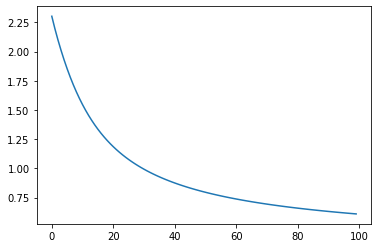

In [18]:
plt.figure()
plt.plot(losses)
plt.show() #loss의 변화

In [19]:
##Model
#build model and optimizer
tf_X = tf.placeholder(tf.float32, [None, 784])
tf_Y = tf.placeholder(tf.float32, [None, 10])

logit = tf.layers.dense(tf_X, 10)
pred = tf.nn.softmax(logit)

#cross entropy loss
loss = tf.losses.softmax_cross_entropy(tf_Y, logit)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

W0821 15:55:35.484030 140469348726528 deprecation.py:323] From <ipython-input-19-2a2ed3089bf0>:6: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0821 15:55:35.487808 140469348726528 deprecation.py:506] From /home/pirl/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0821 15:55:35.727304 140469348726528 deprecation.py:323] From /home/pirl/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions 

In [20]:
#train
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for epoch in range(0, training_epochs):
    sess.run(optimizer, feed_dict={tf_X: X_train, tf_Y:Y_train})
    
print('최적화 완료')

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict={tf_X: X_test, tf_Y: Y_test})
print("정확도: ", accuracy_eval)

최적화 완료
정확도:  0.8673


In [21]:
##confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred = sess.run(pred, feed_dict={tf_X:X_test, tf_Y:Y_test})
confusion_matrix(y_test, np.argmax(y_test_pred, 1))

array([[ 940,    0,    2,    4,    0,    8,   16,    1,    9,    0],
       [   0, 1093,   15,    4,    1,    0,    4,    1,   17,    0],
       [  25,   25,  838,   24,   22,    0,   25,   24,   44,    5],
       [   7,    3,   25,  878,    1,   28,    6,   18,   27,   17],
       [   2,    8,    4,    1,  861,    2,   17,    2,   12,   73],
       [  20,   12,   10,   77,   29,  642,   27,   10,   49,   16],
       [  21,    3,   18,    1,   12,   19,  873,    1,   10,    0],
       [   3,   35,   33,    2,   16,    0,    2,  886,   10,   41],
       [   7,   16,   14,   39,    9,   22,   18,   18,  813,   18],
       [  15,   12,   10,   12,   54,   12,    3,   28,   14,  849]])

### multi-layer logistic regression

click ! restart (?)

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

#fashion mnist 도 관심있으면 해보기

In [23]:
#load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

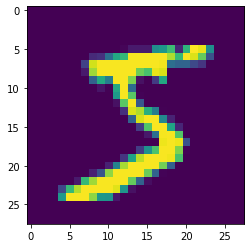

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [24]:
#data check
plt.figure()
plt.imshow(x_train[0])
plt.show()
print(x_train)
print(y_train)

In [25]:
##data preprocessing (x reshape, xnormalize, one-hot encoding)
shape = x_train.shape[1:]

#x data reshape
reshaped_x_train = x_train.reshape(-1, np.prod(shape))
reshaped_x_test = x_test.reshape(-1, np.prod(shape))

#x data normalization
X_train = reshaped_x_train / 255
X_test = reshaped_x_test / 255

# y data one hot encoding
Y_train = np.eye(10)[y_train.reshape(-1)]
Y_test = np.eye(10)[y_test.reshape(-1)]

In [26]:
print('X data shape:', X_train.shape, X_test.shape)
print('Y data shape:', Y_train.shape, Y_test.shape)
print()

print('X train data')
print(X_train)
print('X test data')
print(X_test)
print()

print('Y train data')
print(Y_train)
print('Y test data')
print(Y_test)

X data shape: (60000, 784) (10000, 784)
Y data shape: (60000, 10) (10000, 10)

X train data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X test data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y train data
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Y test data
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Multi Layer Logistic Regression**

In [27]:
#hyper parameter setting
learning_rate = 1e-1
training_epochs = 25
display_step = 5
batch_size = 32
act = tf.nn.relu
h = 200

In [29]:
tf.reset_default_graph()

tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
tf_Y = tf.placeholder(tf.float32, [None,10])

w1 = tf.get_variable('w1', [np.prod(shape), h])
b1 = tf.get_variable('b1',[h])
w2 = tf.get_variable('w2', [h,10])
b2 = tf.get_variable('b2',[10])

hidden1 = act(tf_X @ w1 + b1)
pred = tf.nn.softmax(hidden1 @ w2 + b2)

loss = tf.reduce_mean(-tf.reduce_sum(tf_Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


#tf.reset_default_graph()
##place holder
#tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
#tf_Y = tf.placeholder(tf.float32, [None,10])
##model
#hidden1 = tf.layers.dense(tf_X, h, activation=act)
#logit = tf.layers.dense(hidden1, 10)
#pred = tf.nn.softmax(logit)
##cross entropy loss
#loss = tf.losses.softmax_cross_entropy(tf_Y, logit)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate)minimize(loss)

In [35]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    losses = [sess.run(loss, feed_dict={tf_X:X_train, tf_Y:Y_train})]
    for epoch in range(training_epochs):
        _,I = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_Y:Y_train})
        losses.append(I)
        
        if (epoch+1)% display_step ==0:
            print("Epoch:", epoch + 1, '\tLoss:',I)
    print('최적화 완료')
    
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], feed_dict={tf_X:X_test, tf_Y:Y_test})
    print('정확도:',test_accuracy)

Epoch: 5 	Loss: 2.0145237
Epoch: 10 	Loss: 1.6449193
Epoch: 15 	Loss: 1.3562771
Epoch: 20 	Loss: 1.1436037
Epoch: 25 	Loss: 0.9908431
최적화 완료
정확도: 0.8183


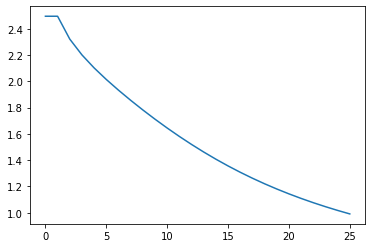

array([[ 928,    0,   28,   12,    3,   34,   25,    8,   12,   14],
       [   0, 1080,   43,   11,   18,   14,   14,   47,   43,   17],
       [   3,    5,  805,   24,    2,   20,   21,   24,   22,    8],
       [  10,    5,   27,  845,    1,  107,    2,    0,   63,    9],
       [   0,    0,   16,    1,  757,   26,    9,   10,   17,  142],
       [   4,    2,    0,   24,    0,  555,   11,    0,   17,    7],
       [  22,    8,   50,   14,   36,   48,  866,    3,   19,    1],
       [   2,    1,   20,   21,    4,   26,    0,  875,   19,   41],
       [  10,   33,   40,   44,    4,   36,   10,   19,  723,   21],
       [   1,    1,    3,   14,  157,   26,    0,   42,   39,  749]])

In [36]:
#plot losses
plt.figure()
plt.plot(losses)
plt.show()

#print confusion matrix
confusion_matrix(np.argmax(y_test_pred,1), y_test)

In [37]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    #init
    sess.run(init)
    #train
    total_batch = int(len(X_train)/batch_size)
    losses = [sess.run(loss, feed_dict={tf_X:X_train, tf_Y:Y_train})]
    for epoch in range(0, training_epochs):
        for i in range(total_batch):
            #get batch
            x_batch = X_train[i*batch_size:(i+1)*batch_size]
            y_batch = Y_train[i*batch_size:(i+1)*batch_size]
            
            #get loss in sess.run ###batch input
            _,I = sess.run([optimizer, loss], feed_dict={tf_X:x_batch, tf_Y:y_batch})
        losses.append(I) #save loss
        
        if (epoch+1)% display_step ==0:
            print("Epoch:", epoch + 1, '\tLoss:',I)
    print('최적화 완료')
    
    #result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], feed_dict={tf_X:X_test, tf_Y:Y_test})
    print('정확도:',test_accuracy)

Epoch: 5 	Loss: 0.017692996
Epoch: 10 	Loss: 0.0061934916
Epoch: 15 	Loss: 0.0027506952
Epoch: 20 	Loss: 0.0022309064
Epoch: 25 	Loss: 0.0011980622
최적화 완료
정확도: 0.98


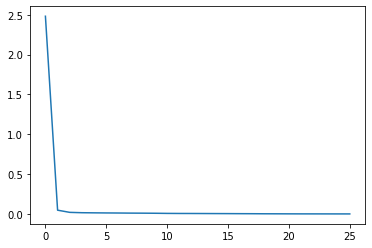

array([[ 974,    0,    4,    1,    0,    2,    6,    2,    7,    2],
       [   0, 1127,    1,    0,    0,    0,    3,    5,    1,    2],
       [   1,    2, 1016,    5,    4,    0,    3,   10,    5,    0],
       [   0,    1,    1,  990,    0,    6,    1,    0,    7,    4],
       [   1,    0,    2,    0,  968,    2,    6,    4,    4,   11],
       [   0,    1,    0,    4,    0,  873,    7,    1,    6,    2],
       [   0,    2,    1,    0,    1,    4,  932,    0,    3,    1],
       [   1,    1,    4,    2,    1,    2,    0, 1000,    2,    2],
       [   2,    1,    3,    2,    0,    2,    0,    1,  934,    1],
       [   1,    0,    0,    6,    8,    1,    0,    5,    5,  984]])

In [33]:
#plot losses
plt.figure()
plt.plot(losses)
plt.show()

#print confusion matrix
confusion_matrix(np.argmax(y_test_pred,1), y_test)

In [38]:
## train and result (with batch - iteration losses)
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = [sess.run(loss, feed_dict={tf_X: X_train, tf_Y: Y_train})]  # init loss list
    iteration_losses = [sess.run(loss, feed_dict={tf_X: X_train, tf_Y: Y_train})] ### init iteration losses
    for epoch in range(0, training_epochs):
        # shuffle
        idx = np.random.permutation(len(X_train))
        shuffled_X_train = X_train[idx]
        shuffled_Y_train = Y_train[idx]
        
        for i in range(total_batch):
            # get batch
            x_batch = shuffled_X_train[i*batch_size:(i+1)*batch_size]
            y_batch = shuffled_Y_train[i*batch_size:(i+1)*batch_size]
            
            # get loss in sess.run # batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
            iteration_losses.append(l)  ### save iteration loss
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy)

Epoch: 5 	Loss: 0.012583742
Epoch: 10 	Loss: 0.003447161
Epoch: 15 	Loss: 0.005379557
Epoch: 20 	Loss: 0.015217696
Epoch: 25 	Loss: 0.005712798
최적화 완료
정확도: 0.9814


test accuracy: 0.9814


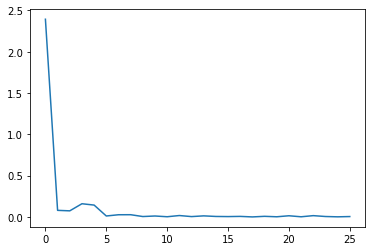

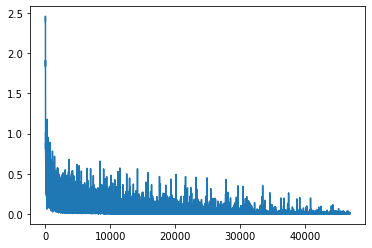

array([[ 970,    0,    4,    2,    0,    2,    5,    2,    3,    1],
       [   0, 1127,    1,    0,    0,    0,    3,    3,    0,    2],
       [   1,    2, 1008,    3,    3,    0,    2,    6,    4,    0],
       [   0,    1,    4,  991,    0,    5,    1,    3,    6,    3],
       [   1,    0,    3,    0,  967,    1,    4,    0,    6,    7],
       [   1,    0,    0,    3,    0,  875,    3,    0,    3,    1],
       [   2,    2,    2,    0,    3,    2,  939,    0,    2,    1],
       [   1,    1,    5,    3,    2,    1,    0, 1006,    3,    5],
       [   3,    2,    5,    1,    0,    3,    1,    3,  942,    0],
       [   1,    0,    0,    7,    7,    3,    0,    5,    5,  989]])

In [39]:
print('test accuracy:', test_accuracy)
# plot losses
plt.figure()
plt.plot(losses)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)